In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn import metrics
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

In [92]:
# Load the Iris dataset
iris = load_iris()
X= pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [93]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [95]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [96]:
X.isnull().sum().sort_values(ascending=False)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [97]:
X.duplicated().sum()

1

In [98]:
X.drop_duplicates(inplace=True)
X.reset_index(drop=True, inplace=True)# Reset index after dropping duplicates

In [99]:
# 2. Feature scaling (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [141]:
# 1. Elbow method to find optimal clusters
wcss = []
silhouette_scores = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    labels = kmeans.labels_
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil_score)

silhouette_scores

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[0.5810395072315083,
 0.49387101479382844,
 0.3985900404567473,
 0.34212959041287433,
 0.3318414761655934,
 0.32717193500941616,
 0.3383123084789235,
 0.33308359769824836,
 0.305246383885222,
 0.3128639533574541]

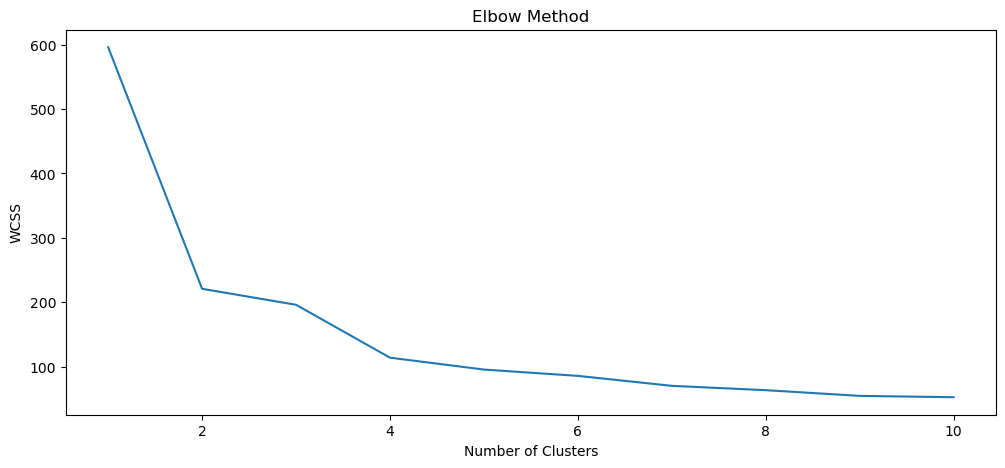

In [108]:
# 4. Plot Elbow Method
plt.figure(figsize=(12, 5))

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# 2. Applying KMeans with 2 clusters (after seeing elbow result)
kmeans = KMeans(n_clusters=2, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [127]:
X['label'] = y_kmeans
X['label']

0      0
1      0
2      0
3      0
4      0
      ..
144    1
145    1
146    1
147    1
148    1
Name: label, Length: 149, dtype: int32

In [ ]:
# 3. Get cluster centers
centers = kmeans.cluster_centers_

# 4. Convert to NumPy array (this line is unnecessary, but harmless)
centers = np.array(centers)
print("Shape of centers:", centers.shape)
print("Cluster centers:\n", centers) # in 4D space

Shape of centers: (2, 4)
Cluster centers:
 [[-1.01155195  0.84683651 -1.29806475 -1.24810205]
 [ 0.51088483 -0.42769521  0.65558826  0.63035457]]


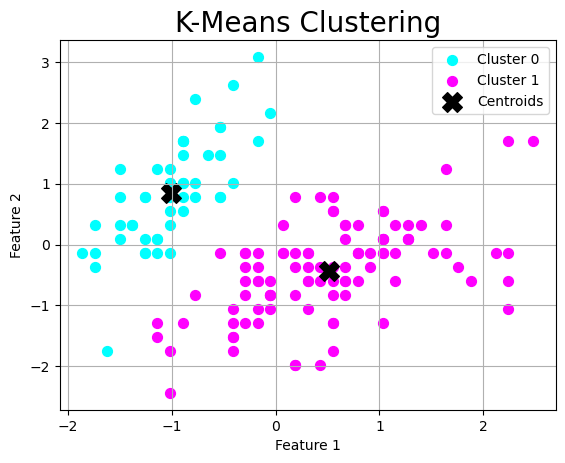

Silhouette Score for K-Means: 0.5810395072315083


In [ ]:
# Define colors for clusters (you have 2 clusters)
colors = ['cyan', 'magenta']

# Plot each point colored by its cluster label
for i in range(2):  # Since n_clusters=2
    plt.scatter(
        X_scaled[y_kmeans == i, 0],
        X_scaled[y_kmeans == i, 1],
        s=50,
        c=colors[i],
        label=f'Cluster {i}'
    )

# Plot cluster centers
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c='black',
    marker='X',
    label='Centroids'
)

# Labels and grid
plt.title('K-Means Clustering', fontsize=20)
plt.xlabel('Feature 1')  
plt.ylabel('Feature 2')  
plt.legend()
plt.grid(True)
plt.show()

# Calculate Silhouette Score (x must be original feature data, not labels)
from sklearn.metrics import silhouette_score

silhouette_score_kmeans = silhouette_score(X_scaled, y_kmeans)
print("Silhouette Score for K-Means:", silhouette_score_kmeans)

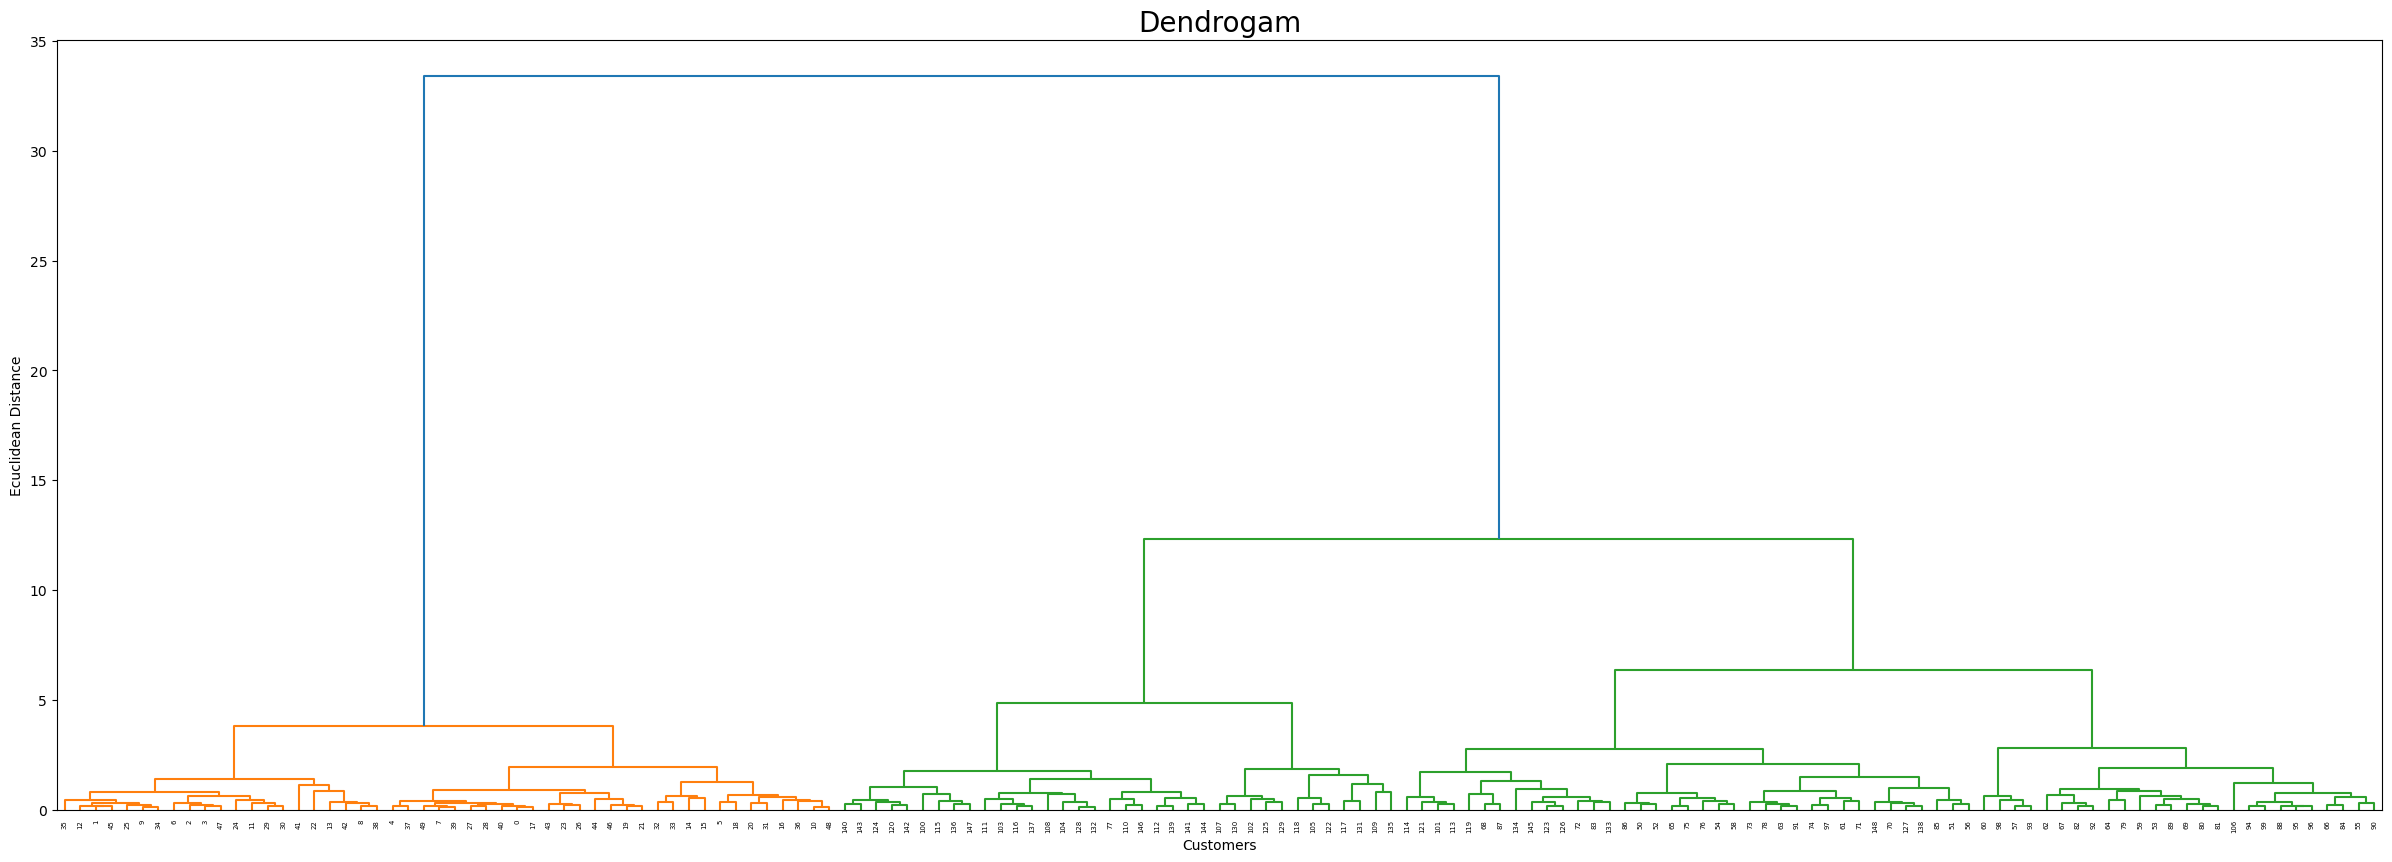

In [134]:
plt.figure(figsize=(30,10))

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.xticks(rotation = 90)
plt.show()